In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from beast.observationmodel import phot

import stsynphot as stsyn

In [2]:
# wavelength grid in angstroms for response functions
waves = np.logspace(3, np.log10(3e4), 501)

## BEAST Bandpass

Ingested in to the BEAST library of filterse based on fits files downloaded from a web page listing a directory with many.  Have not been able to find this web page in Feb 2022.  Used to just google for it if memory serves.

In [3]:
beast_filtername = [
    "HST_WFC3_F225W",
    "HST_WFC3_F275W",
    "HST_WFC3_F336W",
    "HST_WFC3_F475W",
    "HST_ACS_WFC_F475W",
    "HST_ACS_WFC_F550M",
    "HST_WFC3_F814W",
    "HST_ACS_WFC_F814W",
    "HST_WFC3_F110W",
    "HST_WFC3_F160W",
    "HST_WFC3_F127M",
    "HST_WFC3_F139M",
    "HST_WFC3_F153M",
]

In [4]:
flist = phot.load_filters(beast_filtername, interp=True, lamb=waves)

## STSYNPHOT Bandpasses

Official bandpasses.

In [5]:
obsmodes = [
    'wfc3, uvis1, f225w',
    'wfc3, uvis1, f275w',
    'wfc3, uvis1, f336w',
    'wfc3, uvis1, f475w',
    'acs,wfc1,f475w',
    'acs,wfc1,f550m',
    'wfc3, uvis1, f814w',
    'acs,wfc1,f814w',
    'wfc3, ir, f110w',
    'wfc3, ir, f160w',
    'wfc3, ir, f127m',
    'wfc3, ir, f139m',
    'wfc3, ir, f153m',
]

In [6]:
bps = [stsyn.band(cmode) for cmode in obsmodes]

## Plot

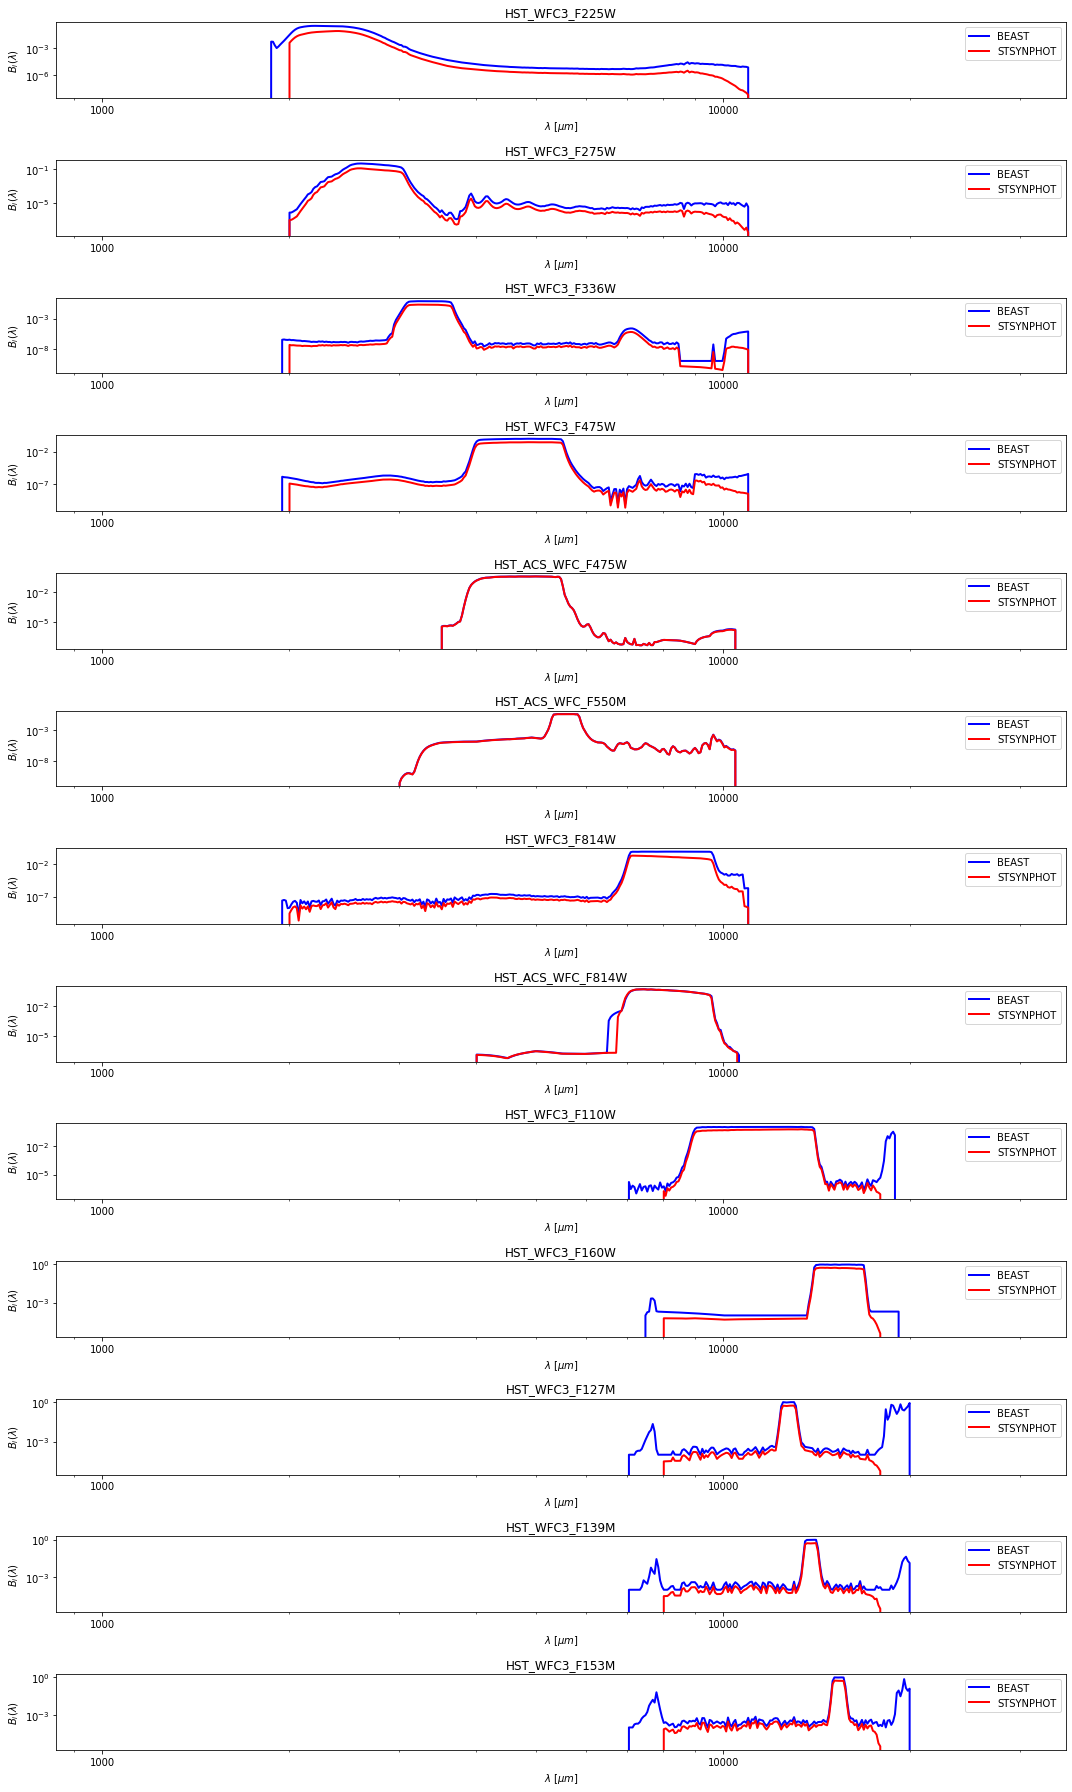

In [7]:
nplots = len(obsmodes)
fig, tax = plt.subplots(nplots, 1, figsize=(15, 25))

for k, (cf, bp, ax) in enumerate(zip(flist, bps, tax)):
    ax.plot(cf.wavelength, cf.transmit, color="blue", lw=2, label="BEAST")
    ax.plot(cf.wavelength, bp(cf.wavelength), color="red", lw=2, label="STSYNPHOT")

    ax.set_title(beast_filtername[k])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\lambda$ [$\mu m$]")
    ax.set_ylabel(r"$B_i(\lambda)$")

    ax.legend()

    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    
fig.tight_layout()